### Pair Programming - Random Forest

- Ajustad un modelo de Random Forest a nuestros datos.
- Calculad las métricas a nuestro nuevo modelo.
- Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [35]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from tqdm import tqdm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [36]:
df_esta = pd.read_csv("data/adults_enco_esta.csv", index_col = 0)
df_esta.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,RowNumber,CreditScore.1,Age.1,Tenure.1,Balance.1,NumOfProducts.1,HasCrCard,IsActiveMember,EstimatedSalary.1,gender_map,France,Germany,Spain
0,0,1.246488,-1.518201,0.687130,1.276364,-0.911583,-0.471235,4428,771,23,7,156123.73,1,1,0,72990.62,0,1,0,0
1,1,0.667069,0.198164,1.032908,-0.324886,0.807737,-0.123595,191,715,41,8,56214.85,2,0,0,92982.61,0,1,0,0
2,1,-1.733383,0.198164,-1.387538,0.670711,-0.911583,1.096511,3939,483,41,1,118334.44,1,0,0,163147.99,1,0,1,0
3,1,-0.191713,0.484225,-0.695982,0.918482,-0.911583,-1.138686,3304,632,44,3,133793.89,1,1,1,34607.14,0,1,0,0
4,0,-0.150326,-0.469311,-0.695982,-1.225848,0.807737,-0.962203,1767,636,34,3,0.00,2,1,1,44756.25,0,1,0,0


In [37]:
# separamos los datos en X e y

X1 = df_esta.drop("Exited", axis = 1)
y1 = df_esta["Exited"]

In [38]:
# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [39]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"n_estimators": [2],
        "max_depth": [2,4, 6, 10, 12, 14], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [40]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [41]:
# ajustamos el modelo que acabamos de definir en el GridSearch
# 🚨 Esta celda puede tardar en ejecutarse

gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [2]},
             verbose=-1)

In [42]:
# saquemos ahora cual es nuestro mejor bosque

bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=12, max_features=2, min_samples_leaf=10,
                       min_samples_split=100, n_estimators=2, random_state=42)

  0%|          | 0/2 [00:00<?, ?it/s]

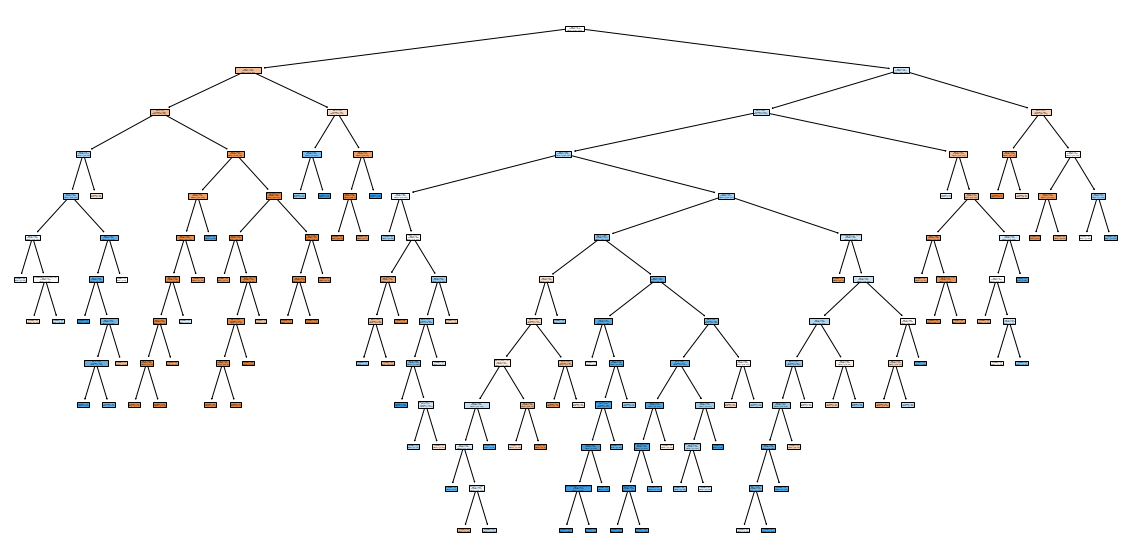

 50%|█████     | 1/2 [00:33<00:33, 33.70s/it]

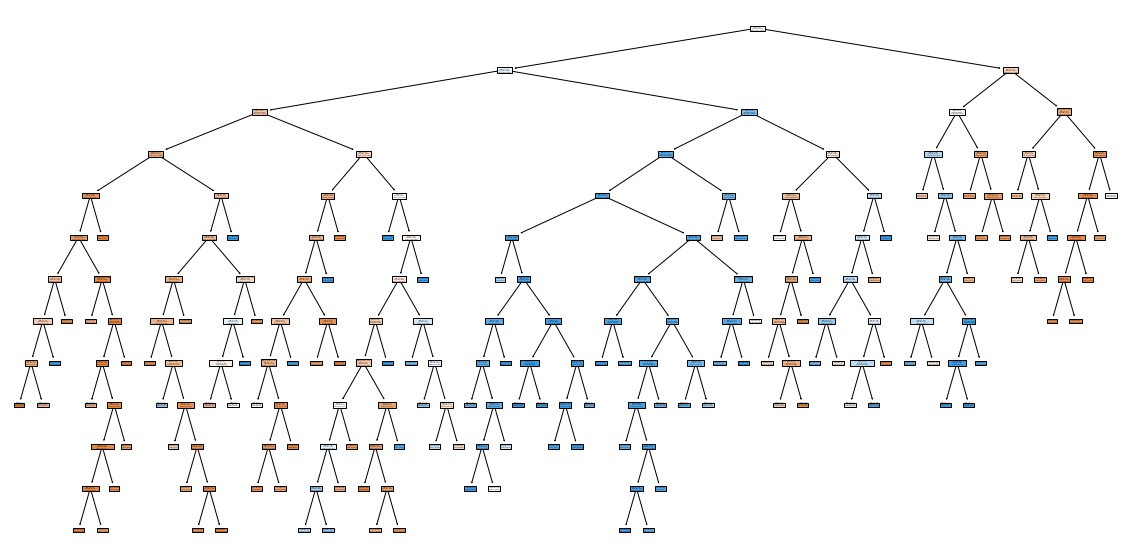

100%|██████████| 2/2 [01:02<00:00, 31.49s/it]


In [43]:
for arbol in tqdm(bosque.estimators_):
    fig = plt.figure(figsize=(20, 10))
    tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
    plt.show()

In [44]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [45]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [46]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
dt_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.820147,0.829442,0.804926,0.817000,0.640267,test,Random Forest
1,0.837818,0.839921,0.834971,0.837438,0.675637,train,Random Forest


In [47]:
# igual que en la clase de decision tree, juntemos estos resultados con los obtenidos en los modelos que hemos hecho hasta ahora
# lo primero que tenemos que hacer es cargar el csv con todos los resultados que guardamos en el jupyter anterior

df_LR_DT_results = pd.read_csv("data/adults_logistic_esta.csv", index_col = 0)
df_LR_DT_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.670762,0.668952,0.672906,0.670923,0.341529,test,Regresión logistica Esta
1,0.676496,0.673248,0.686640,0.679878,0.352984,train,Regresión logistica Esta


In [48]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo

df_todos_resultados = pd.concat([dt_results, df_LR_DT_results], axis = 0).reset_index(drop=True)
df_todos_resultados

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.820147,0.829442,0.804926,0.817000,0.640267,test,Random Forest
1,0.837818,0.839921,0.834971,0.837438,0.675637,train,Random Forest
2,0.670762,0.668952,0.672906,0.670923,0.341529,test,Regresión logistica Esta
3,0.676496,0.673248,0.686640,0.679878,0.352984,train,Regresión logistica Esta


In [49]:
df_todos_resultados.style.background_gradient(cmap='seismic')

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.820147,0.829442,0.804926,0.817000,0.640267,test,Random Forest
1,0.837818,0.839921,0.834971,0.837438,0.675637,train,Random Forest
2,0.670762,0.668952,0.672906,0.670923,0.341529,test,Regresión logistica Esta
3,0.676496,0.673248,0.686640,0.679878,0.352984,train,Regresión logistica Esta


In [50]:

# vamos a crearnos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,Age,0.246838
4,NumOfProducts,0.177048
13,IsActiveMember,0.099569
8,Age.1,0.086539
10,Balance.1,0.073484
16,France,0.049446
2,Tenure,0.039132
18,Spain,0.038336
11,NumOfProducts.1,0.037930
3,Balance,0.037515


In [52]:
# lo primero que hacemos es crearnos un dataframe con los valores solo de adulto, es decir, la primera y antepenúltima fila
countries = importancia_predictores.loc[[16, 17, 18]]
countries

,predictor,importancia
16,France,0.049446
17,Germany,0.008160
18,Spain,0.038336


In [53]:
# eliminamos esas filas del dataframe donde tenemos los valores de importancia

importancia_predictores.drop(countries.index, inplace = True)

In [55]:
# nos creamos nuevas filas con el resultado de la suma

importancia_predictores.loc[5] =  ["Countries", countries["importancia"].sum()]
# ordenamos el df

importancia_predictores.sort_values(by = "importancia", ascending = False, inplace = True)
importancia_predictores

,predictor,importancia
1,Age,0.246838
4,NumOfProducts,0.177048
13,IsActiveMember,0.099569
5,Countries,0.095942
8,Age.1,0.086539
10,Balance.1,0.073484
2,Tenure,0.039132
11,NumOfProducts.1,0.037930
3,Balance,0.037515
15,gender_map,0.030882


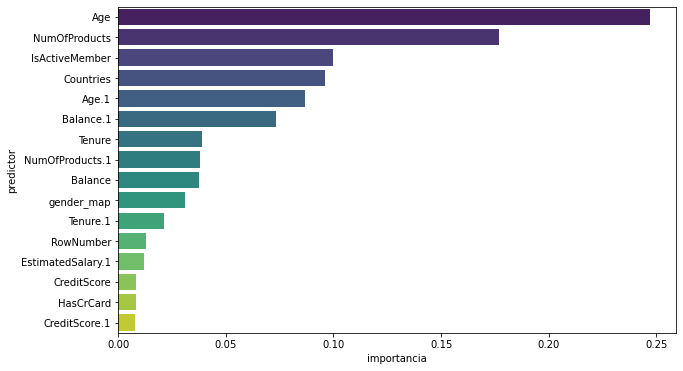

In [56]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()